# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [3]:
import pandas as pd
import numpy as np

In [4]:
passengers = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/passengers.csv')

In [5]:
fuelconsumption = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/fuel_consumption.csv')

In [6]:
fuelconsumption.isnull().sum()

month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [7]:
flights = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/flights.csv')

In [8]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [9]:
flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  291
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 1640
dep_delay                1667
taxi_out                 1738
wheels_off               1738
wheels_on                1795
taxi_in                  1795
crs_arr_time                0
arr_time                 1751
arr_delay                1990
cancelled                   0
cancellation_code       98293
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      1973
air_time                 2017
flights                     0
distance                    0
carrier_de

In [10]:
#Dropped 33 columns
flights1 = flights.drop(['op_carrier_fl_num', 'mkt_unique_carrier', 'dep_time', 'actual_elapsed_time', 'air_time','dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'dest', 'dest_city_name','origin', 'origin_city_name', 'branded_code_share', 'carrier_delay','weather_delay','nas_delay','security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime','longest_add_gtime','cancelled', 'cancellation_code', 'diverted', 'dup', 'flights', 'no_name'], axis = 1)

In [11]:
flights1.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier',
       'tail_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time',
       'crs_arr_time', 'arr_delay', 'crs_elapsed_time', 'distance'],
      dtype='object')

In [12]:
tail_number_mode = flights1['tail_num'].mode()
tail_number_mode

0    N492HA
dtype: object

In [13]:
flights1['tail_num'] = flights1['tail_num'].fillna(str(tail_number_mode[0]))

In [14]:
flights1['arr_delay'] = flights1['arr_delay'].fillna(flights1['arr_delay'].mean())

In [15]:
flights1.isnull().sum()

fl_date               0
mkt_carrier           0
mkt_carrier_fl_num    0
op_unique_carrier     0
tail_num              0
origin_airport_id     0
dest_airport_id       0
crs_dep_time          0
crs_arr_time          0
arr_delay             0
crs_elapsed_time      0
distance              0
dtype: int64

* adding month, day of the week, day of the month

In [16]:
flights1['fl_date'] = pd.to_datetime(flights1['fl_date'], errors='coerce')
flights1['month'] = flights1['fl_date'].dt.month
flights1['day_of_week'] = flights1['fl_date'].dt.dayofweek
flights1['day_of_month'] = flights1['fl_date'].dt.day
flights1['year'] = flights1['fl_date'].dt.year

In [17]:
flights1=flights1.drop('fl_date', axis = 1)

In [18]:
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year
0,AA,5052,OH,N557NN,11057,11995,1634,1733,-4.0,59,83,11,2,27,2019
1,AA,5812,YV,N952LR,13851,11298,1652,1802,24.0,70,175,12,3,26,2019
2,WN,1270,WN,N962WN,15304,14730,955,1155,0.0,120,727,10,3,25,2018
3,DL,2031,DL,N979AT,10397,15624,1342,1353,31.0,71,250,6,0,25,2018
4,B6,2705,B6,N547JB,11618,11697,1646,1952,-10.0,186,1065,11,2,20,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NK,292,NK,N667NK,12889,12266,1845,2342,-9.0,177,1222,12,6,2,2018
99996,AA,1537,AA,N352PS,14492,13930,1450,1611,18.0,141,646,6,5,29,2019
99997,DL,4293,OO,N875AS,12003,14869,1759,1944,-14.0,105,463,12,0,17,2018
99998,WN,5594,WN,N8694E,14107,13232,1445,2000,-11.0,195,1444,3,0,19,2018


In [19]:
# flights2 = flights1.copy()
# flights_cat = flights2.drop(['arr_delay'], axis=1)

In [20]:
#flights_cat

* get_dummies categorical features, didnt end up using

In [21]:
#df_dum = pd.get_dummies(flights1['dest_airport_id'])

In [22]:
flights1.dtypes

mkt_carrier            object
mkt_carrier_fl_num      int64
op_unique_carrier      object
tail_num               object
origin_airport_id       int64
dest_airport_id         int64
crs_dep_time            int64
crs_arr_time            int64
arr_delay             float64
crs_elapsed_time        int64
distance                int64
month                   int64
day_of_week             int64
day_of_month            int64
year                    int64
dtype: object

In [23]:
flights1['arr_delay'].min()

-85.0

In [24]:
flights1 = flights1[(flights1['arr_delay']>0)]
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year
1,AA,5812,YV,N952LR,13851,11298,1652,1802,24.000000,70,175,12,3,26,2019
3,DL,2031,DL,N979AT,10397,15624,1342,1353,31.000000,71,250,6,0,25,2018
5,DL,1987,DL,N923DN,13303,10397,1123,1329,32.000000,126,594,11,0,26,2018
7,AA,4049,MQ,N535EA,13930,14576,1845,2130,5.575309,105,528,11,0,26,2018
10,DL,1517,DL,N3732J,14747,10721,1029,1902,85.000000,333,2496,4,3,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,AA,4991,PT,N621AE,11057,10994,1426,1532,17.000000,66,168,4,1,9,2019
99991,AA,1776,AA,N560UW,10721,14100,1730,1917,5.000000,107,280,10,4,12,2018
99992,DL,5051,9E,N298PQ,13244,12953,600,939,46.000000,159,963,5,3,31,2018
99993,WN,3964,WN,N8549Z,11259,14771,2030,2215,201.000000,225,1476,9,6,8,2019


* make the types categories

In [25]:
#flights1["mkt_unique_carrier"] = flights1["mkt_unique_carrier"].astype("category")
flights1["mkt_carrier"] = flights1["mkt_carrier"].astype("category")
flights1["op_unique_carrier"] = flights1["op_unique_carrier"].astype("category")
flights1["tail_num"] = flights1["tail_num"].astype("category")
#flights1["op_carrier_fl_num"] = flights1["op_carrier_fl_num"].astype("category")
flights1["origin_airport_id"] = flights1["origin_airport_id"].astype("category")
flights1["dest_airport_id"] = flights1["dest_airport_id"].astype("category")
flights1["mkt_carrier_fl_num"] = flights1["mkt_carrier_fl_num"].astype("category")

<ipython-input-25-0cd3233bf8ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights1["mkt_carrier"] = flights1["mkt_carrier"].astype("category")
<ipython-input-25-0cd3233bf8ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights1["op_unique_carrier"] = flights1["op_unique_carrier"].astype("category")
<ipython-input-25-0cd3233bf8ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [26]:
flights1.dtypes

mkt_carrier           category
mkt_carrier_fl_num    category
op_unique_carrier     category
tail_num              category
origin_airport_id     category
dest_airport_id       category
crs_dep_time             int64
crs_arr_time             int64
arr_delay              float64
crs_elapsed_time         int64
distance                 int64
month                    int64
day_of_week              int64
day_of_month             int64
year                     int64
dtype: object

* make arr_delay categorial

In [28]:
flights1['arr_delay_cat'] = flights1['arr_delay'].apply(lambda x: 1 if x > 5 else 0)

<ipython-input-28-8a8e30c7d35b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights1['arr_delay_cat'] = flights1['arr_delay'].apply(lambda x: 1 if x > 5 else 0)


In [29]:
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat
1,AA,5812,YV,N952LR,13851,11298,1652,1802,24.000000,70,175,12,3,26,2019,1
3,DL,2031,DL,N979AT,10397,15624,1342,1353,31.000000,71,250,6,0,25,2018,1
5,DL,1987,DL,N923DN,13303,10397,1123,1329,32.000000,126,594,11,0,26,2018,1
7,AA,4049,MQ,N535EA,13930,14576,1845,2130,5.575309,105,528,11,0,26,2018,1
10,DL,1517,DL,N3732J,14747,10721,1029,1902,85.000000,333,2496,4,3,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,AA,4991,PT,N621AE,11057,10994,1426,1532,17.000000,66,168,4,1,9,2019,1
99991,AA,1776,AA,N560UW,10721,14100,1730,1917,5.000000,107,280,10,4,12,2018,0
99992,DL,5051,9E,N298PQ,13244,12953,600,939,46.000000,159,963,5,3,31,2018,1
99993,WN,3964,WN,N8549Z,11259,14771,2030,2215,201.000000,225,1476,9,6,8,2019,1


In [30]:
# ENCODE AIRPORTS AND TAILNUM
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
flights1['mkt_carrier'] = encoder.fit_transform(flights1[['mkt_carrier']])
#flights1['mkt_unique_carrier'] = encoder.fit_transform(flights1[['mkt_unique_carrier']])
flights1['mkt_carrier_fl_num'] = encoder.fit_transform(flights1[['mkt_carrier_fl_num']])
flights1['op_unique_carrier'] = encoder.fit_transform(flights1[['op_unique_carrier']])
flights1['tail_num'] = encoder.fit_transform(flights1[['tail_num']])
#flights1['op_carrier_fl_num'] = encoder.fit_transform(flights1[['op_carrier_fl_num']])
flights1['origin_airport_id'] = encoder.fit_transform(flights1[['origin_airport_id']])
flights1['dest_airport_id'] = encoder.fit_transform(flights1[['dest_airport_id']])

<ipython-input-30-bfc2adc0a88c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights1['mkt_carrier'] = encoder.fit_transform(flights1[['mkt_carrier']])
<ipython-input-30-bfc2adc0a88c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights1['mkt_carrier_fl_num'] = encoder.fit_transform(flights1[['mkt_carrier_fl_num']])
<ipython-input-30-bfc2adc0a88c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [31]:
flights1

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,24.000000,70,175,12,3,26,2019,1
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,31.000000,71,250,6,0,25,2018,1
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,32.000000,126,594,11,0,26,2018,1
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,5.575309,105,528,11,0,26,2018,1
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,85.000000,333,2496,4,3,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,17.000000,66,168,4,1,9,2019,1
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,5.000000,107,280,10,4,12,2018,0
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,46.000000,159,963,5,3,31,2018,1
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,201.000000,225,1476,9,6,8,2019,1


In [32]:
flights2 = flights1.copy()
flights_cat = flights2.drop(['arr_delay'], axis=1)

In [33]:
flights_cat

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,70,175,12,3,26,2019,1
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,71,250,6,0,25,2018,1
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,126,594,11,0,26,2018,1
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,105,528,11,0,26,2018,1
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,333,2496,4,3,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,66,168,4,1,9,2019,1
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,107,280,10,4,12,2018,0
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,159,963,5,3,31,2018,1
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,225,1476,9,6,8,2019,1


In [34]:
flights_cat = flights_cat.join(flights1['arr_delay'])

In [35]:
flights_cat

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat,arr_delay
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,70,175,12,3,26,2019,1,24.000000
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,71,250,6,0,25,2018,1,31.000000
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,126,594,11,0,26,2018,1,32.000000
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,105,528,11,0,26,2018,1,5.575309
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,333,2496,4,3,11,2019,1,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,66,168,4,1,9,2019,1,17.000000
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,107,280,10,4,12,2018,0,5.000000
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,159,963,5,3,31,2018,1,46.000000
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,225,1476,9,6,8,2019,1,201.000000


In [36]:
def time_cat(flights_cat, col):
#flights_cat['arr_delay_cat'] = flights_cat['arr_delay'].apply(lambda x: if x > 40: return 2)
    length=[]
    for i in flights_cat[col]:
        if (i >0) and (i <= 5):
            length.append(0) # 1 = short delay
        elif (i > 5) and (i<= 30):
            length.append(1) # 2 = medium delay
        elif (i > 30): 
            length.append(2) # 2 = high delay  
            
    flights_cat['time_cat'] = length

In [37]:
print(time_cat(flights_cat, 'arr_delay'))

None


In [38]:
flights_cat

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat,arr_delay,time_cat
1,0.0,5701.0,25.0,5554.0,245.0,92.0,1652,1802,70,175,12,3,26,2019,1,24.000000,1
3,3.0,2017.0,8.0,5792.0,20.0,357.0,1342,1353,71,250,6,0,25,2018,1,31.000000,2
5,3.0,1973.0,8.0,5238.0,222.0,21.0,1123,1329,126,594,11,0,26,2018,1,32.000000,2
7,0.0,3967.0,16.0,2503.0,249.0,296.0,1845,2130,105,528,11,0,26,2018,1,5.575309,1
10,3.0,1503.0,8.0,1677.0,312.0,46.0,1029,1902,333,2496,4,3,11,2019,1,85.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.0,4893.0,20.0,2931.0,72.0,66.0,1426,1532,66,168,4,1,9,2019,1,17.000000,1
99991,0.0,1762.0,2.0,2623.0,45.0,265.0,1730,1917,107,280,10,4,12,2018,0,5.000000,0
99992,3.0,4951.0,0.0,1232.0,216.0,200.0,600,939,159,963,5,3,31,2018,1,46.000000,2
99993,10.0,3885.0,24.0,4508.0,88.0,314.0,2030,2215,225,1476,9,6,8,2019,1,201.000000,2


In [43]:
flights_cat = flights_cat.sort_values(by = 'time_cat')
flights_cat

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat,arr_delay,time_cat
45456,10.0,1980.0,24.0,4672.0,187.0,45.0,1420,1705,105,519,2,1,13,2018,0,1.0,0
17405,3.0,1538.0,8.0,5453.0,43.0,100.0,845,1124,99,456,3,4,9,2018,0,1.0,0
17482,3.0,1963.0,8.0,1683.0,323.0,132.0,840,926,106,546,10,2,9,2019,0,3.0,0
21028,6.0,153.0,14.0,2294.0,173.0,153.0,906,1000,54,216,12,6,22,2019,0,2.0,0
78738,0.0,4300.0,26.0,1951.0,222.0,213.0,2141,2352,191,1251,6,1,25,2019,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20805,0.0,1616.0,2.0,4956.0,20.0,92.0,1624,1754,150,731,5,5,4,2019,1,54.0,2
20816,0.0,3983.0,16.0,875.0,67.0,92.0,1712,1925,133,685,8,0,13,2018,1,98.0,2
20818,1.0,3249.0,19.0,597.0,88.0,200.0,1700,2136,216,1381,10,3,11,2018,1,196.0,2
75030,1.0,3276.0,19.0,711.0,88.0,261.0,700,920,260,1626,5,2,1,2019,1,37.0,2


In [50]:
flights_cat_means=flights_cat.groupby('time_cat', as_index=False)['arr_delay'].mean().rename(columns = {'arr_delay': 'arr_delay_mean'})

In [51]:
flights_cat_means.head()

,time_cat,arr_delay_mean
0,0,2.869754
1,1,13.905073
2,2,95.149355


In [52]:
flights_cat = flights_cat.merge(flights_cat_means, on = ('time_cat'))
flights_cat

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year,arr_delay_cat,arr_delay_x,time_cat,arr_delay_y,arr_delay,arr_delay_mean
0,10.0,1980.0,24.0,4672.0,187.0,45.0,1420,1705,105,519,2,1,13,2018,0,1.0,0,2.869754,2.869754,2.869754
1,3.0,1538.0,8.0,5453.0,43.0,100.0,845,1124,99,456,3,4,9,2018,0,1.0,0,2.869754,2.869754,2.869754
2,3.0,1963.0,8.0,1683.0,323.0,132.0,840,926,106,546,10,2,9,2019,0,3.0,0,2.869754,2.869754,2.869754
3,6.0,153.0,14.0,2294.0,173.0,153.0,906,1000,54,216,12,6,22,2019,0,2.0,0,2.869754,2.869754,2.869754
4,0.0,4300.0,26.0,1951.0,222.0,213.0,2141,2352,191,1251,6,1,25,2019,0,3.0,0,2.869754,2.869754,2.869754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36458,0.0,1616.0,2.0,4956.0,20.0,92.0,1624,1754,150,731,5,5,4,2019,1,54.0,2,95.149355,95.149355,95.149355
36459,0.0,3983.0,16.0,875.0,67.0,92.0,1712,1925,133,685,8,0,13,2018,1,98.0,2,95.149355,95.149355,95.149355
36460,1.0,3249.0,19.0,597.0,88.0,200.0,1700,2136,216,1381,10,3,11,2018,1,196.0,2,95.149355,95.149355,95.149355
36461,1.0,3276.0,19.0,711.0,88.0,261.0,700,920,260,1626,5,2,1,2019,1,37.0,2,95.149355,95.149355,95.149355


In [ ]:
#flights_cat_final = flights_cat.drop('arr_delay_cat', 'arr_delay_x', 'arr_delay_y', 'arr_delay', 'arr_delay_mean')

In [45]:
type(flights_cat)

pandas.core.frame.DataFrame

In [40]:
#flights_cat.sort_values('time_cat',flights_cat['arr_delay'].mean())

In [135]:
flights_cat.dtypes

mkt_carrier           float64
mkt_carrier_fl_num    float64
op_unique_carrier     float64
tail_num              float64
origin_airport_id     float64
dest_airport_id       float64
crs_dep_time            int64
crs_arr_time            int64
crs_elapsed_time        int64
distance                int64
month                   int64
day_of_week             int64
day_of_month            int64
year                    int64
arr_delay_cat           int64
dtype: object

In [141]:
flights_cat["arr_delay_cat"] = flights_cat["arr_delay_cat"].astype("category")

In [142]:
flights_cat.dtypes

mkt_carrier            float64
mkt_carrier_fl_num     float64
op_unique_carrier      float64
tail_num               float64
origin_airport_id      float64
dest_airport_id        float64
crs_dep_time             int64
crs_arr_time             int64
crs_elapsed_time         int64
distance                 int64
month                    int64
day_of_week              int64
day_of_month             int64
year                     int64
arr_delay_cat         category
dtype: object

In [144]:
import seaborn as sns
#sns.histplot(data = flights_cat, x='arr_delay_cat')

In [145]:
flights_cat['arr_delay_cat'].describe()

count     36463
unique        2
top           1
freq      29100
Name: arr_delay_cat, dtype: int64

In [146]:
flights_cat.corr()

,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,day_of_week,day_of_month,year
mkt_carrier,1.000000,-0.041392,0.600304,-0.028036,0.041239,0.026541,0.041819,0.025098,-0.017057,0.015921,-0.006863,0.006609,0.005167,-0.008581
mkt_carrier_fl_num,-0.041392,1.000000,0.257338,-0.042709,-0.026074,-0.041861,-0.023457,-0.006985,-0.343655,-0.374453,0.007164,0.052366,0.017549,-0.024739
op_unique_carrier,0.600304,0.257338,1.000000,-0.008751,0.043701,0.028045,0.021469,0.006592,-0.182920,-0.160813,-0.004737,0.000094,0.012628,-0.009552
tail_num,-0.028036,-0.042709,-0.008751,1.000000,-0.040365,-0.035785,0.007887,-0.000596,-0.017298,-0.012537,-0.008109,-0.003402,-0.008107,-0.014627
origin_airport_id,0.041239,-0.026074,0.043701,-0.040365,1.000000,0.023460,-0.042443,-0.011003,0.046801,0.068720,0.002045,-0.008244,-0.006614,-0.000857
dest_airport_id,0.026541,-0.041861,0.028045,-0.035785,0.023460,1.000000,0.017514,0.014918,0.087633,0.077727,0.001838,0.002965,0.002587,-0.000757
crs_dep_time,0.041819,-0.023457,0.021469,0.007887,-0.042443,0.017514,1.000000,0.658931,-0.028651,-0.019259,0.006159,0.014415,-0.003020,0.003019
crs_arr_time,0.025098,-0.006985,0.006592,-0.000596,-0.011003,0.014918,0.658931,1.000000,0.014570,0.009971,0.000573,0.008442,-0.005078,0.001061
crs_elapsed_time,-0.017057,-0.343655,-0.182920,-0.017298,0.046801,0.087633,-0.028651,0.014570,1.000000,0.982455,-0.007804,0.006286,-0.003563,0.025023
distance,0.015921,-0.374453,-0.160813,-0.012537,0.068720,0.077727,-0.019259,0.009971,0.982455,1.000000,0.002685,0.010120,-0.002833,0.016664


<AxesSubplot:>

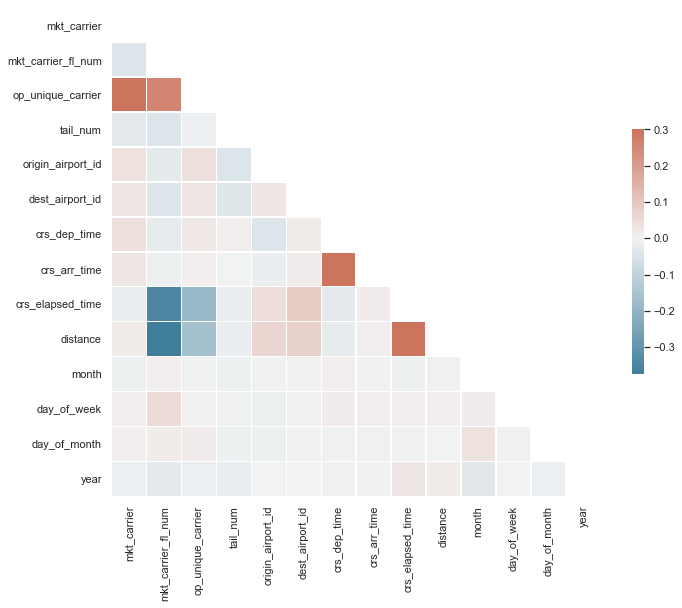

In [147]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Compute the correlation matrix
corr = flights_cat.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [148]:
flights_cat.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'month', 'day_of_week', 'day_of_month',
       'year', 'arr_delay_cat'],
      dtype='object')

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [149]:
# dont need PCA if didnt do get_dummies

* PCA testing

In [150]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [151]:
pca_test = PCA(n_components=5)
principalComponents_test = pca_test.fit_transform(flights1)

In [152]:
principalComponents_test.shape

(36463, 5)

In [153]:
pca_test

PCA(n_components=5)

### Modeling

Use different ML techniques to predict each problem.

- linear
- Naive Bayes
- Random Forest Regressor
- SVM classification
- XGBoost regresspr
- The ensemble of your own choice

#### pickle module to save model

In [154]:
import pickle

* target and features

In [155]:
y_cat = np.array(flights_cat.arr_delay_cat)

In [156]:
X_df = flights_cat.drop(['arr_delay_cat'], axis = 1)

In [157]:
X = np.array(X_df)
X

array([[0.000e+00, 5.701e+03, 2.500e+01, ..., 3.000e+00, 2.600e+01,
        2.019e+03],
       [3.000e+00, 2.017e+03, 8.000e+00, ..., 0.000e+00, 2.500e+01,
        2.018e+03],
       [3.000e+00, 1.973e+03, 8.000e+00, ..., 0.000e+00, 2.600e+01,
        2.018e+03],
       ...,
       [3.000e+00, 4.951e+03, 0.000e+00, ..., 3.000e+00, 3.100e+01,
        2.018e+03],
       [1.000e+01, 3.885e+03, 2.400e+01, ..., 6.000e+00, 8.000e+00,
        2.019e+03],
       [0.000e+00, 1.523e+03, 2.000e+00, ..., 5.000e+00, 2.900e+01,
        2.019e+03]])

* train test split and making samples

In [158]:
import sklearn.model_selection as model_selection

In [159]:
#creating y_train_cat and y_test_cat
X_train, X_test, y_train_cat, y_test_cat = model_selection.train_test_split(X, y_cat, train_size=0.70,test_size=0.30, random_state=101, shuffle = True, stratify=None)

In [160]:
#X_train_sample = pd.DataFrame(X_train).sample(frac = 0.50, random_state=101)

In [161]:
#y_train_sample = pd.DataFrame(y_train).sample(frac = 0.50, random_state=101)

In [162]:
#y_trainCat_sample = pd.DataFrame(y_train_cat).sample(frac = 0.50, random_state=101)

In [163]:
#X_test_sample = pd.DataFrame(X_test).sample(frac = 0.10, random_state=101)

In [164]:
#y_test_sample = pd.DataFrame(y_test).sample(frac = 0.10, random_state=101)

In [165]:
#X_testindex = X_test_sample.index

In [166]:
#X_trainindex = X_train_sample.index

* Scaling

In [167]:
'''scaler = StandardScaler()
X = scaler.fit_transform(X)'''

'scaler = StandardScaler()\nX = scaler.fit_transform(X)'

In [168]:
'''y = (y - y.mean()) / y.std()'''

'y = (y - y.mean()) / y.std()'

In [169]:
from sklearn.naive_bayes import GaussianNB

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [172]:
pipe = Pipeline([('scaler', StandardScaler())])
pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler())])

* Scaling PIPE

#### Naives Bayes, GaussianNB Naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB

In [174]:
NB_Gauss_model = GaussianNB()

In [175]:
NB_Gauss_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('NB_Gauss_model', GaussianNB())])

In [176]:
classifier = NB_Gauss_pipe.fit(X_train, y_train_cat)

In [177]:
#print('R2 score: {0:.2f}'.format(NB_Gauss_pipe.score(X_train, y_train_cat)))

In [178]:
#print('R2 score: {0:.2f}'.format(NB_Gauss_pipe.score(X_test, y_test_cat)))

In [179]:
y_pred_NBGauss = NB_Gauss_pipe.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score

In [181]:
accuracy_score(y_test_cat, y_pred_NBGauss)

0.7992503885181461

In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_cat, y_pred_NBGauss)

array([[   0, 2196],
       [   0, 8743]])

In [183]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(y_test_cat, y_pred_NBGauss))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2196
           1       0.80      1.00      0.89      8743

    accuracy                           0.80     10939
   macro avg       0.40      0.50      0.44     10939
weighted avg       0.64      0.80      0.71     10939



/Users/annajose/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
y_test_cat.mean()

0.7992503885181461

In [186]:
#from sklearn.metrics import multilabel_confusion_matrix

In [187]:
#multilabel_confusion_matrix(y_test_cat, y_pred_NBGauss)

In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [189]:
y_test_cat

array([1, 1, 1, ..., 1, 1, 0])

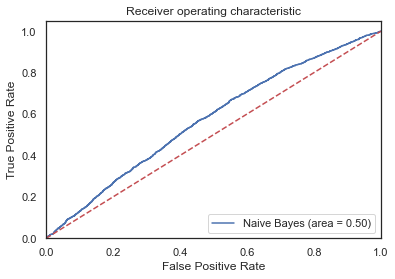

In [190]:
import matplotlib.pyplot as plt
NB_roc_auc = roc_auc_score(y_test_cat, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_cat, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

#### Forrest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
random_forest_class = RandomForestClassifier()

In [193]:
hyperparameters ={
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    #'min_samples_split':
    #"min_samples_split": [1, 3, 10],
    #"min_samples_leaf": [1, 3, 10],
    # "bootstrap": [True, False],
    #"criterion": ["gini", "entropy"]}

#    'rand_forrestClass__bootstrap': [False]
}

In [194]:
#Forest_class_pipe = ('rand_forrestClass', RandomForestClassifier())
forest_class_grid = GridSearchCV(estimator=random_forest_class, param_grid=hyperparameters, scoring = 'f1', verbose=0, cv= 5)

* test with sample to find best hyperparameters

In [195]:
#rand_forrestClass_grid = GridSearchCV(estimator=random_forest_class, param_grid=hyperparameters, scoring = 'r2', verbose=0, cv= 5)

In [196]:
#forest_class_grid.fit(X_train_sample, y_trainCat_sample.values.ravel())
#y_pred_randFor_class = forest_class_grid.predict(X_test_sample)

In [197]:
#forest_class_grid.best_estimator_

* adjusted to best hyperparameters

In [198]:
forest_class_grid.fit(X_train, y_train_cat)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [50, 100]},
             scoring='f1')

In [199]:
forest_class_grid.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [200]:
random_forest_class=RandomForestClassifier(max_depth= 3, n_estimators= 50)

In [201]:
random_forest_class.fit(X_train, y_train_cat)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [202]:
y_pred_randFor_class = random_forest_class.predict(X_test)

In [203]:
#forest_class_grid.best_estimator_

In [204]:
#r2_score = forest_class_grid.score(X_test, y_pred_randFor_class)
#r2_score

In [205]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_cat, y_pred_randFor_class))

Accuracy for Random Forest on CV data:  0.7992503885181461


In [206]:
accuracy_score(y_test_cat, y_pred_randFor_class)

0.7992503885181461

In [207]:
confusion_matrix(y_test_cat, y_pred_randFor_class)

array([[   0, 2196],
       [   0, 8743]])

In [208]:
print(classification_report(y_test_cat, y_pred_NBGauss))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2196
           1       0.80      1.00      0.89      8743

    accuracy                           0.80     10939
   macro avg       0.40      0.50      0.44     10939
weighted avg       0.64      0.80      0.71     10939



/Users/annajose/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


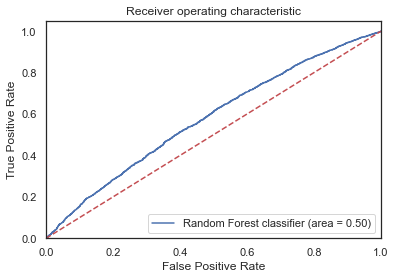

In [209]:
import matplotlib.pyplot as plt
NB_roc_auc = roc_auc_score(y_test_cat, forest_class_grid.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_cat, forest_class_grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest classifier (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest Classifier_ROC')
plt.show()

In [210]:
with open('model_Forrest_class_pickle', 'wb') as forest_class_file:
    pickle.dump(forest_class_grid, forest_class_file)

In [211]:
with open('model_Forrest_class_pickle', 'rb') as forest_class_file:
    model_forrestClass_pred = pickle.load(forest_class_file)

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

* pickling

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.